In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src directory to path
sys.path.append("../src")

from data_integration import integrate_all_data


In [3]:
master_df, summary_df = integrate_all_data(input_dir="../data", output_dir="../data")
master_df.head()


🔵 Starting data integration...
📄 Loading: ofac_sdn.csv
📄 Loading: bis_entity_list.csv
📄 Loading: unverified_list.csv
📄 Loading: denied_persons_list.csv
📄 Loading: meu_list.csv
📄 Loading: military_intelligence_end_user_list.csv
📄 Loading: consolidated_screening_list.csv
📄 Loading: kyc_red_flags.csv
🟡 Merging all watchlists...
✅ Master screening dataset saved to: ../data\master_screening_dataset.csv
📊 Summary saved to: ../data\master_screening_summary.csv


,name,country,address,list_type,program,risk_level,source,notes
0,Abdul Rahman Trading Co,Afghanistan,None,OFAC_SDN,SDGT,High,OFAC,None
1,Abdullah Hassan,Pakistan,None,OFAC_SDN,SDNTK,High,OFAC,None
2,Abu Nasser Group,Iraq,None,OFAC_SDN,SDGT,High,OFAC,None
3,AeroTech Import Export Ltd,China,None,OFAC_SDN,NPWMD,High,OFAC,None
4,Ahsan Logistics Inc,Turkey,None,OFAC_SDN,SDGT,High,OFAC,None


In [4]:
summary_df


,list_type,count
0,OFAC_SDN,256
1,UVL,169
2,DPL,158
3,ENTITY_LIST,146
4,MEU,141
5,MIEU,127
6,CSL,74


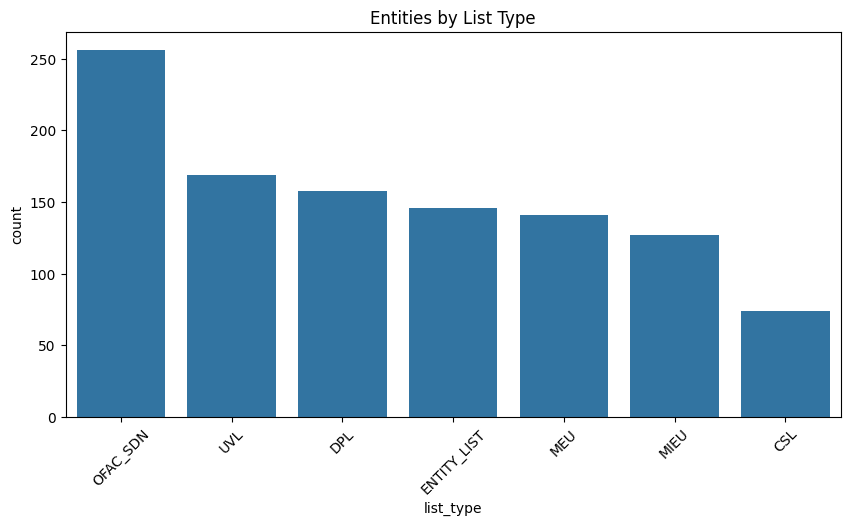

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=summary_df, x="list_type", y="count", ax=ax)
plt.xticks(rotation=45)
plt.title("Entities by List Type")

fig.savefig("../dashboard/list_distribution.png", bbox_inches="tight", dpi=300)
plt.show()


In [6]:
master_df.isna().sum()


name            0
country         0
address       402
list_type       0
program       741
risk_level      0
source          0
notes         997
dtype: int64

In [7]:
master_df[master_df["risk_level"] == "High"].head(20)


,name,country,address,list_type,program,risk_level,source,notes
0,Abdul Rahman Trading Co,Afghanistan,None,OFAC_SDN,SDGT,High,OFAC,None
1,Abdullah Hassan,Pakistan,None,OFAC_SDN,SDNTK,High,OFAC,None
2,Abu Nasser Group,Iraq,None,OFAC_SDN,SDGT,High,OFAC,None
3,AeroTech Import Export Ltd,China,None,OFAC_SDN,NPWMD,High,OFAC,None
4,Ahsan Logistics Inc,Turkey,None,OFAC_SDN,SDGT,High,OFAC,None
5,Akhtar Ali,Saudi Arabia,None,OFAC_SDN,SDGT,High,OFAC,None
6,Al Aqsa Martyrs Brigade,Palestine,None,OFAC_SDN,SDT,High,OFAC,None
7,Al Baraka Exchange,UAE,None,OFAC_SDN,SDGT,High,OFAC,None
8,Al Furat Trading LLC,Syria,None,OFAC_SDN,SDGT,High,OFAC,None
9,Al Huda Trust,Pakistan,None,OFAC_SDN,SDGT,High,OFAC,None


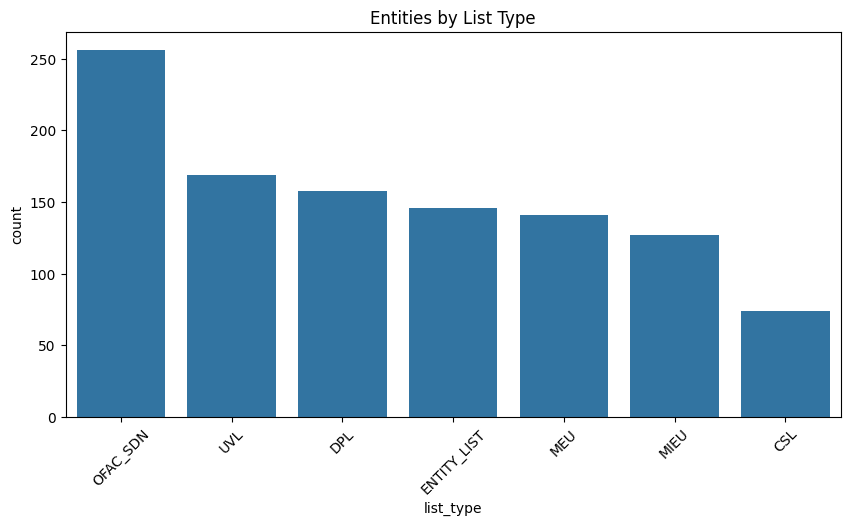

'c:\\Users\\kulve\\Downloads\\sanctions-screening-automation-main\\sanctions-screening-automation-main\\dashboard\\list_distribution.png'

In [14]:
import os

# ensure correct folder
dashboard_path = "../dashboard"

# recreate dashboard folder
os.makedirs(dashboard_path, exist_ok=True)

# plot and save new image
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=summary_df, x="list_type", y="count", ax=ax)
plt.xticks(rotation=45)
plt.title("Entities by List Type")

save_path = os.path.abspath(os.path.join(dashboard_path, "list_distribution.png"))
fig.savefig(save_path, bbox_inches="tight", dpi=300)

plt.show()

save_path
